In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA

import xgboost as xgb
from datetime import datetime


%matplotlib inline

Datasource: http://yann.lecun.com/exdb/mnist/

The training dataset consists of 60,000 training digits and the test set contains 10,000 samples, respectively. The images in the MNIST dataset consist of  pixels, and each pixel is represented by a gray scale intensity value. Here, we unroll the  pixels into 1D row vectors, which represent the rows in our image array (784 per row or image). The second array (labels) returned by the load_mnist function contains the corresponding target variable, the class labels (integers 0-9) of the handwritten digits.

In [2]:
training = pd.read_csv("data/MNIST/mnist_train.csv", header = None)
testing = pd.read_csv("data/MNIST/mnist_test.csv", header = None)

In [3]:
X_train, y_train = training.iloc[:, 1:].values, training.iloc[:, 0].values 
X_test, y_test = testing.iloc[:, 1:].values, testing.iloc[:, 0].values 

In [4]:
print("Shape of X_train: ", X_train.shape, "shape of y_train: ", y_train.shape)
print("Shape of X_test: ", X_test.shape, "shape of y_test: ", y_test.shape)

Shape of X_train:  (60000, 784) shape of y_train:  (60000,)
Shape of X_test:  (10000, 784) shape of y_test:  (10000,)


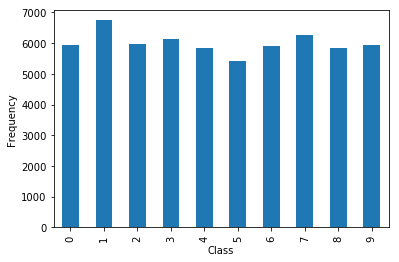

In [5]:
pd.Series(y_train).value_counts().sort_index().plot.bar()
plt.xlabel("Class")
plt.ylabel("Frequency")

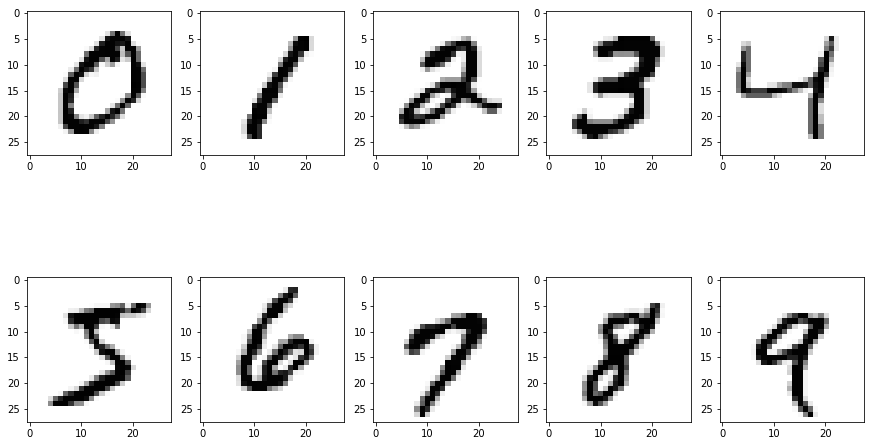

In [6]:
fig, axes = plt.subplots(2, 5, figsize = (15, 9))

for i, ax in enumerate(fig.axes):
    img = X_train[y_train == i][0].reshape(28, 28)
    ax.imshow(img, cmap = "Greys", interpolation="nearest")

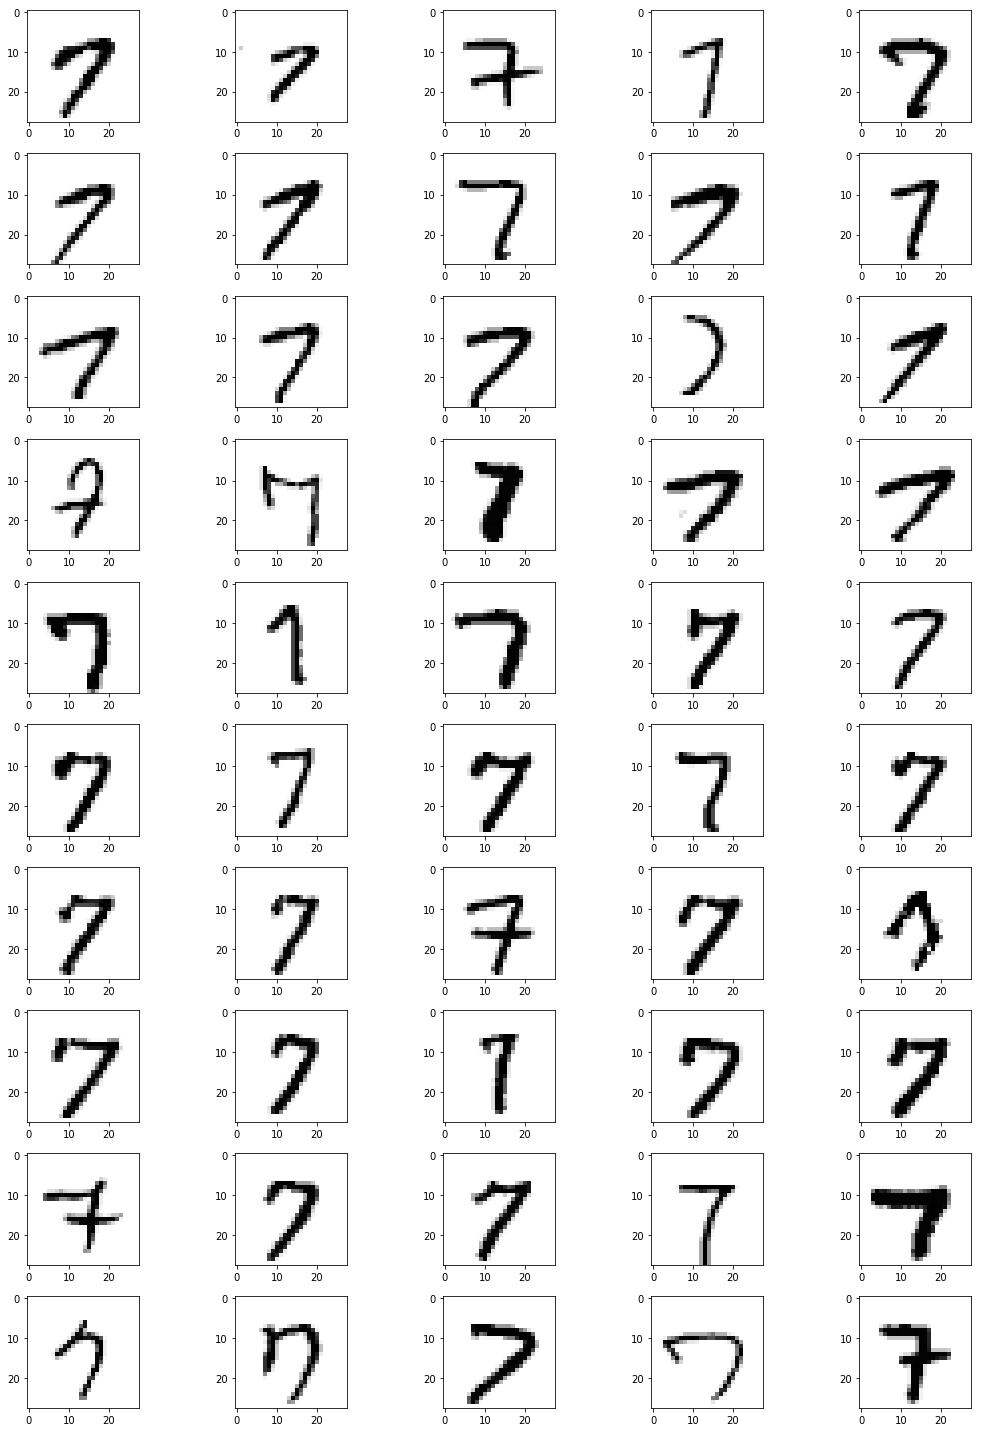

In [7]:
fig, axes = plt.subplots(10, 5, figsize = (15, 20))

for i, ax in enumerate(fig.axes):
    img = X_train[y_train == 7][i].reshape(28, 28)
    ax.imshow(img, cmap = "Greys", interpolation="nearest")

plt.tight_layout()

In [8]:
X_train_std = X_train / 255
X_test_std = X_test / 255

In [9]:
lr = LogisticRegression()
lr.fit(X_train_std, y_train)
lr.score(X_test_std, y_test)

0.92020000000000002

No of miss:  798


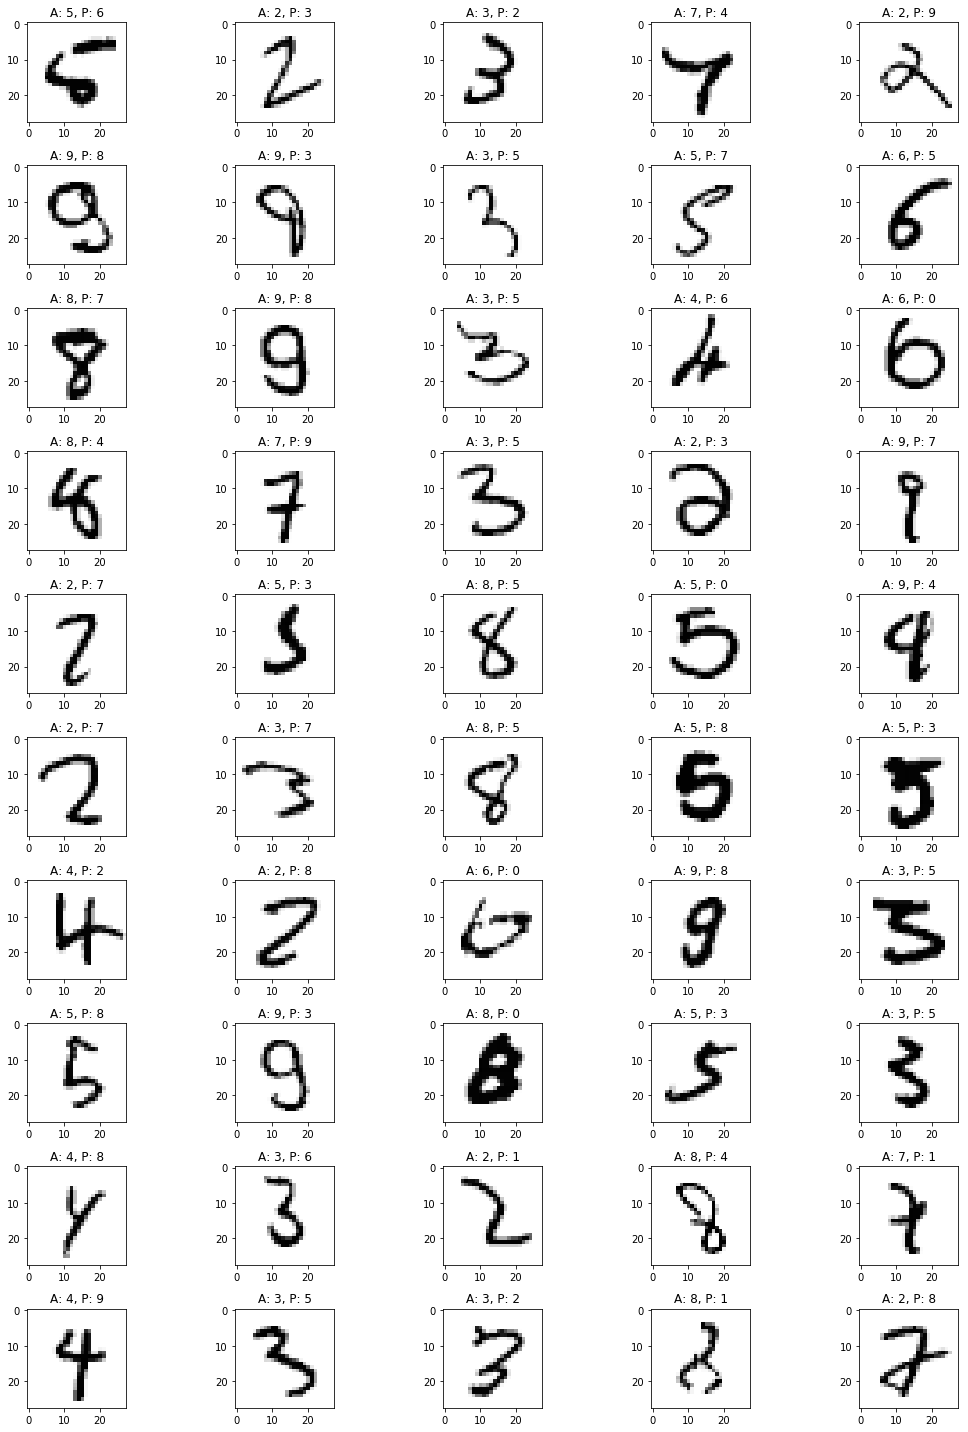

In [10]:
y_test_pred = lr.predict(X_test_std)
miss_indices = (y_test != y_test_pred)
misses = X_test_std[miss_indices]
print("No of miss: ", misses.shape[0])

fig, axes = plt.subplots(10, 5, figsize = (15, 20))
misses_actual = y_test[miss_indices]
misses_pred = y_test_pred[miss_indices]

for i, ax in enumerate(fig.axes):
    img = misses[i].reshape(28, 28)
    ax.imshow(img, cmap = "Greys", interpolation="nearest")
    ax.set_title("A: %s, P: %d" % (misses_actual[i], misses_pred[i]))
plt.tight_layout()

In [11]:
start_time = datetime.now()
gbm = xgb.XGBClassifier(n_jobs=-1)
gbm.fit(X_train_std, y_train)
gbm.score(X_test_std, y_test)
print("Time taken: %d seconds" % (datetime.now() - start_time).seconds)

Time taken: 736 seconds


In [12]:
pca = PCA(n_components=9)
X_train_std_pca = pca.fit_transform(X_train_std)
X_test_std_pca = pca.transform(X_test_std)

start_time = datetime.now()
lr.fit(X_train_std_pca, y_train)
print("Accuracy score: ", lr.score(X_test_std_pca, y_test))
print("Time taken: %d seconds" % (datetime.now() - start_time).seconds)

Accuracy score:  0.7749
Time taken: 4 seconds


In [13]:
def show(X, y, rows = 10, cols = 5):
    fig, axes = plt.subplots(rows, cols, figsize = (15, 10))
    for i, ax in enumerate(fig.axes):
        ax.imshow(X[i].reshape(1, -1), cmap = "Greys", interpolation="nearest", )
        ax.set_title(y[i])
        ax.axis("on")
    plt.tight_layout()

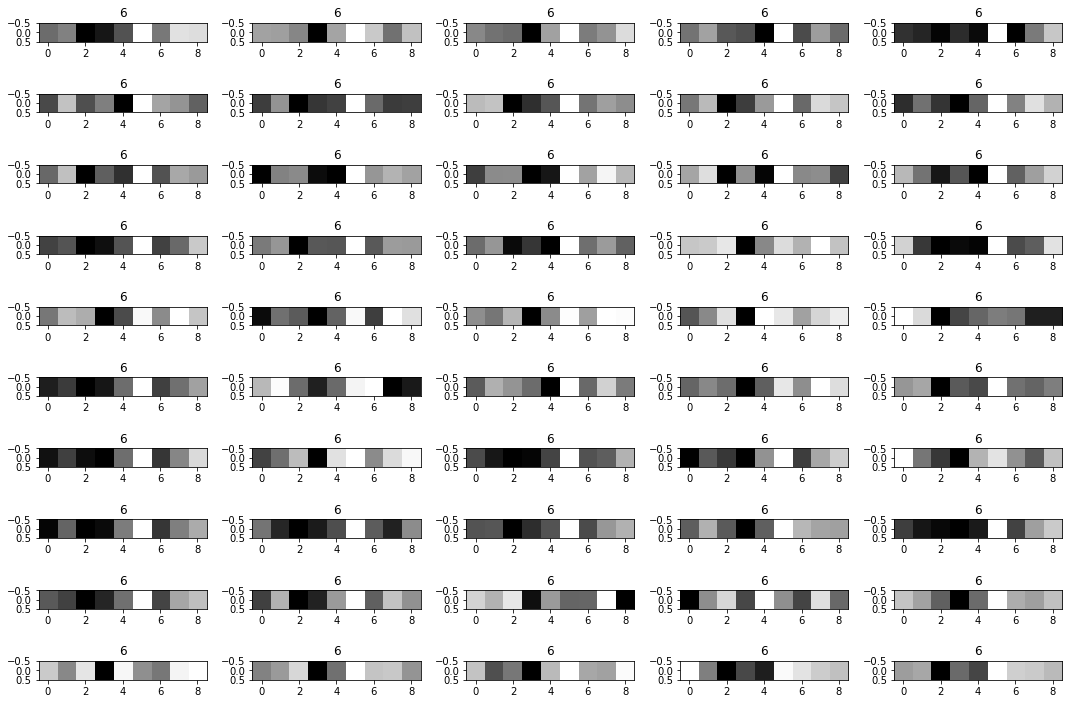

In [14]:
digit = 6
show(X_train_std_pca[y_train == digit], y_train[y_train == digit])

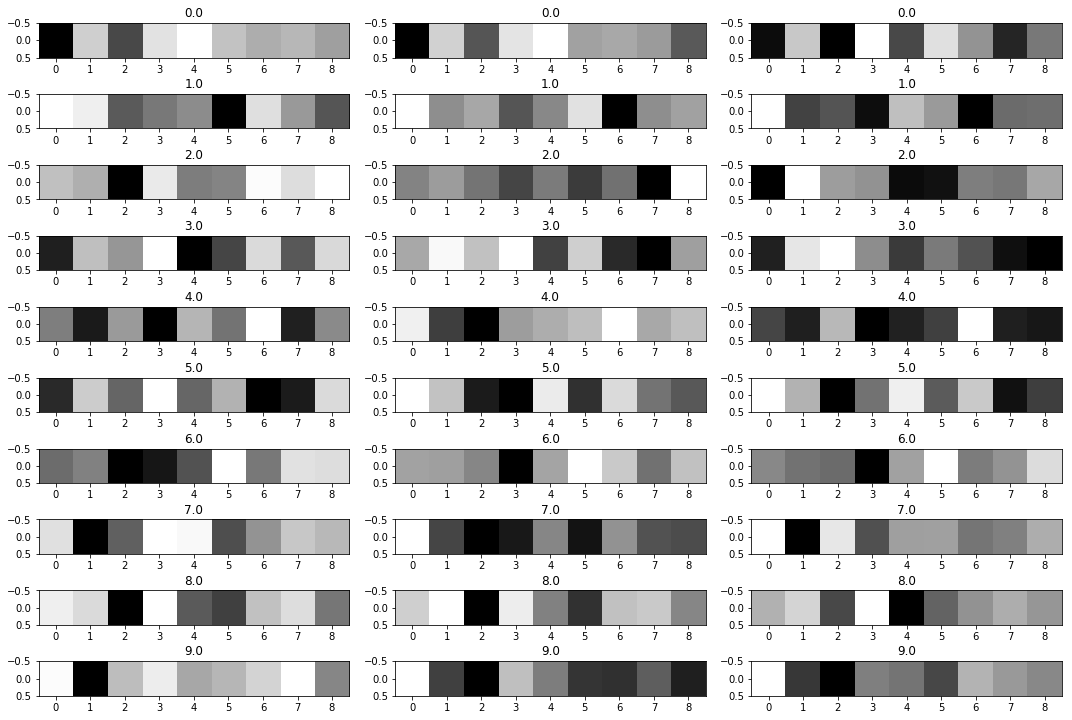

In [15]:
X_filtered = np.empty([0, 9])
y_filtered = np.empty([0])
for i in np.arange(0, 10):
    X_filtered = np.vstack([X_filtered, X_train_std_pca[y_train == i][:3, :]])
    y_filtered = np.hstack([y_filtered, y_train[y_train == i][:3]])
show(X_filtered, y_filtered, rows = 10, cols = 3)